In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = "fer2013/train" 
test_dir = "fer2013/test"  

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        
    height_shift_range = 0.1,       
    horizontal_flip = True,         
    rescale = 1./255,               
    validation_split = 0.2          
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               
    validation_split = 0.2          
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           
    target_size = (48, 48),          
    batch_size = 64,                 
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "training"              
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            
    target_size = (48, 48),          
    batch_size = 64,                 
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "validation"            
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [23]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 2.2237 - accuracy: 0.2323
Epoch 1: val_accuracy improved from -inf to 0.24441, saving model to model_weights.h5
359/359 [==============================] - 208s 571ms/step - loss: 2.2237 - accuracy: 0.2323 - val_loss: 1.7828 - val_accuracy: 0.2444
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 1.6888 - accuracy: 0.3586
Epoch 2: val_accuracy improved from 0.24441 to 0.39036, saving model to model_weights.h5
359/359 [==============================] - 120s 335ms/step - loss: 1.6888 - accuracy: 0.3586 - val_loss: 1.5290 - val_accuracy: 0.3904
Epoch 3/50
359/359 [==============================] - ETA: 0s - loss: 1.4888 - accuracy: 0.4316
Epoch 3: val_accuracy improved from 0.39036 to 0.47696, saving model to model_weights.h5
359/359 [==============================] - 116s 323ms/step - loss: 1.4888 - accuracy: 0.4316 - val_loss: 1.3904 - val_accuracy: 0.4770
Epoch 4/50
359/359 [=======================

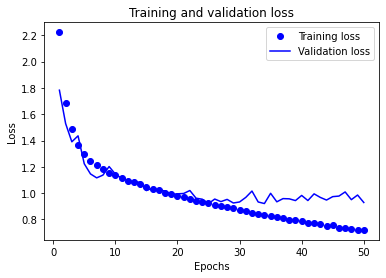

In [15]:
import matplotlib.pyplot as plt
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

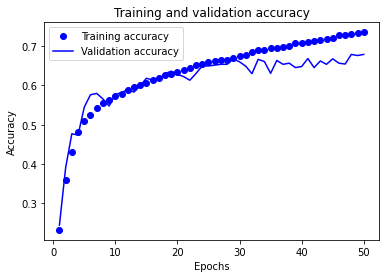

In [16]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 2s 69ms/step


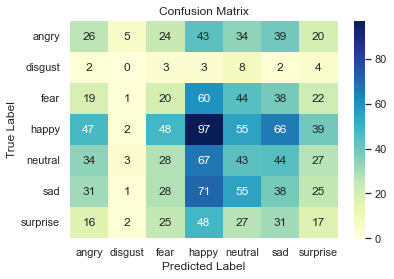

In [18]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [5]:
!pip install keras2onnx

Defaulting to user installation because normal site-packages is not writeable


In [18]:
!pip install tensorflow==2.2

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.2


In [19]:
!pip install tensorflow tf2onnx

Defaulting to user installation because normal site-packages is not writeable
  Using cached tf2onnx-1.14.0-py3-none-any.whl (451 kB)
  Using cached flatbuffers-2.0.7-py2.py3-none-any.whl (26 kB)


In [21]:
!pip install onnxruntime

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [29]:
!pip install tensorflow==1.13.1

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==1.13.1


In [31]:
import tf2onnx.convert
import onnx

from tensorflow.keras.models import load_model
keras_mdoel = load_model('emotion_detection_model.h5')

onnx_model, _ = tf2onnx.convert.from_keras(keras_mdoel)
onnx.save(onnx_model, 'model.onnx')